# Z Factor

Can it all be so simple?

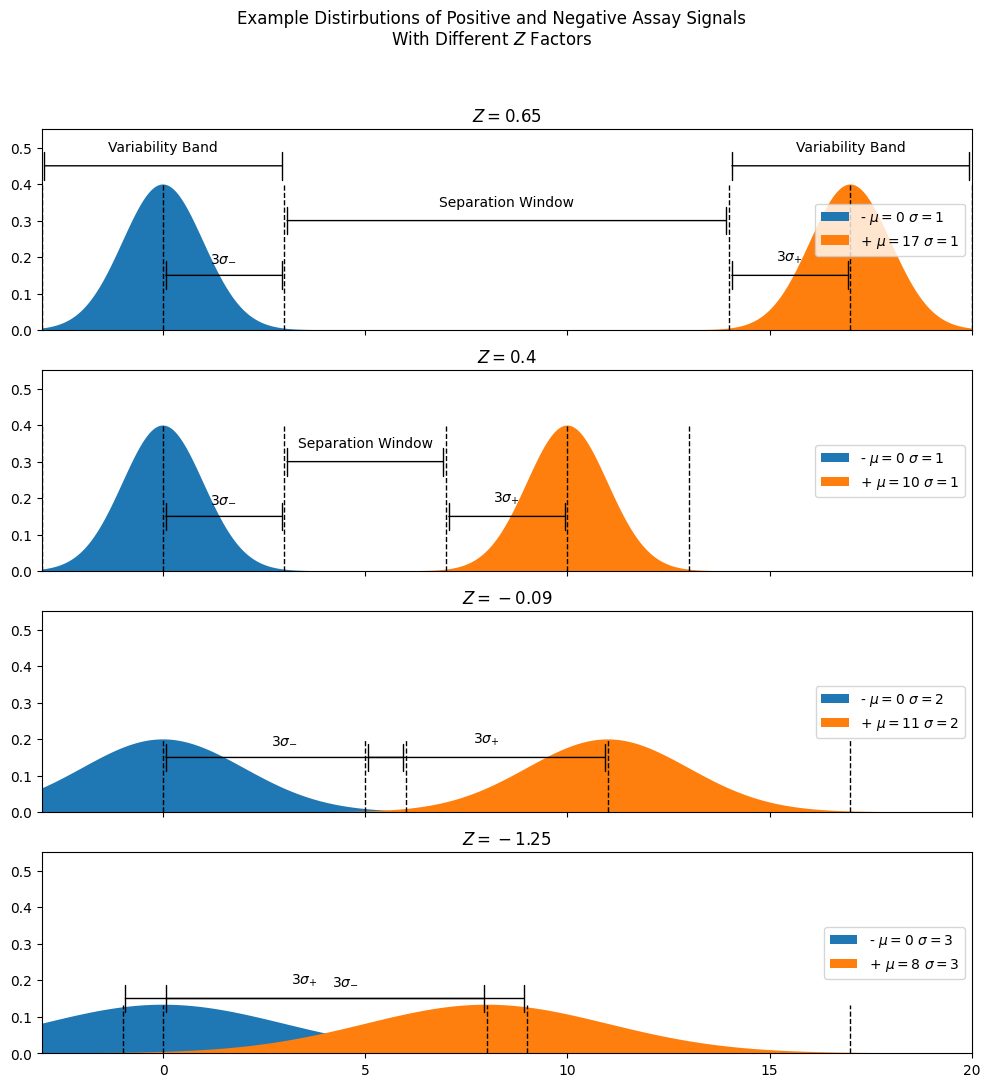

In [10]:
import os
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

save_dir = 'z-factor'
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

parameter_sets = [
                    {"eg_mu_pos": 17,
                    "eg_sigma_pos": 1,
                    "eg_mu_neg": 0,
                    "eg_sigma_neg": 1,
                    }, 
                    {"eg_mu_pos": 10,
                    "eg_sigma_pos": 1,
                    "eg_mu_neg": 0,
                    "eg_sigma_neg": 1,
                    }, 
                   {"eg_mu_pos": 11,
                    "eg_sigma_pos": 2,
                    "eg_mu_neg": 0,
                    "eg_sigma_neg": 2,
                    },
                   {"eg_mu_pos": 8,
                    "eg_sigma_pos": 3,
                    "eg_mu_neg": 0,
                    "eg_sigma_neg": 3,
                    },
                   ]

x = np.linspace(-3, 20, 512)

fig, axs = plt.subplots(len(parameter_sets), 
                        1, 
                        figsize=(12, 3 * len(parameter_sets)),
                        sharex=True,
                       )

first_plot = True

for params, ax in zip(parameter_sets, axs.flatten()):

    eg_mu_pos = params.get("eg_mu_pos")
    eg_sigma_pos = params.get("eg_sigma_pos")
    eg_mu_neg = params.get("eg_mu_neg")
    eg_sigma_neg = params.get("eg_sigma_neg")

    z = 1 - ((3 * eg_sigma_neg + 3 * eg_sigma_pos)/abs(eg_mu_pos - eg_mu_neg))
    
    eg_dist_neg = stats.norm.pdf(x, eg_mu_neg, eg_sigma_neg)
    eg_dist_pos = stats.norm.pdf(x, eg_mu_pos, eg_sigma_pos)
    
    
    ax.fill_between(x, eg_dist_neg, np.zeros_like(eg_dist_neg), label=f'- $\mu = {eg_mu_neg:.0f}$ $\sigma = {eg_sigma_neg:.0f}$')
    ax.fill_between(x, eg_dist_pos, np.zeros_like(eg_dist_pos), label=f'+ $\mu = {eg_mu_pos:.0f}$ $\sigma = {eg_sigma_pos:.0f}$')
    # ax.plot(x, eg_dist_pos, label='+')
    
    # mean lines
    ax.vlines(eg_mu_neg, 0, max(eg_dist_neg), lw=1, linestyle='--', color='#000000')
    ax.vlines(eg_mu_pos, 0, max(eg_dist_pos), lw=1, linestyle='--', color='#000000')
    
    # 3 sigma lines
    eg_ulim_neg = eg_mu_neg + 3 * eg_sigma_neg
    eg_llim_neg = eg_mu_neg - 3 * eg_sigma_neg
    
    ax.vlines(eg_ulim_neg, 0, max(eg_dist_neg), lw=1, linestyle='--', color='#000000')
    ax.vlines(eg_llim_neg, 0, max(eg_dist_neg), lw=1, linestyle='--', color='#000000')
    
    # ax.vlines(eg_mu_pos + 3 * eg_sigma_pos, 0, max(eg_dist_pos), lw=1, linestyle='--')
    # ax.vlines(eg_mu_pos - 3 * eg_sigma_pos, 0, max(eg_dist_pos), lw=1, linestyle='--')
    
    eg_ulim_pos = eg_mu_pos + 3 * eg_sigma_pos
    eg_llim_pos = eg_mu_pos - 3 * eg_sigma_pos
    
    ax.vlines(eg_ulim_pos, 0, max(eg_dist_pos), lw=1, linestyle='--', color='#000000')
    ax.vlines(eg_llim_pos, 0, max(eg_dist_pos), lw=1, linestyle='--', color='#000000')

    if eg_ulim_neg < eg_llim_pos :
        ax.annotate('', xy=(eg_ulim_neg, 0.3), xytext=(eg_llim_pos, 0.3), arrowprops=dict(arrowstyle='|-|') )
        ax.text(x=eg_ulim_neg + ((eg_llim_pos - eg_ulim_neg)/2), 
                y=0.35,
                s='Separation Window',
                ha='center',
                va='center',
                )
    
    ax.annotate('', xy=(eg_ulim_neg, 0.15), xytext=(eg_mu_neg, 0.15), arrowprops=dict(arrowstyle='|-|') )
    
    ax.text(x=eg_ulim_neg - (eg_sigma_neg * 1.5), 
            y=0.20,
            s='3$\sigma_{-}$',
            ha='center',
            va='center',
            )
    
    ax.annotate('', xy=(eg_llim_pos, 0.15), xytext=(eg_mu_pos, 0.15), arrowprops=dict(arrowstyle='|-|') )
    ax.text(x=eg_llim_pos + (eg_sigma_pos * 1.5), 
            y=0.20,
            s='3$\sigma_{+}$',
            ha='center',
            va='center',
            )
    ax.set_title(f'$Z = {round(z, 2)}$')
    

    if first_plot:
        ax.annotate('', xy=(eg_llim_neg, 0.45), xytext=(eg_ulim_neg, 0.45), arrowprops=dict(arrowstyle='|-|') )
        ax.text(x=eg_mu_neg,
                y=0.50,
                s='Variability Band',
                ha='center',
                va='center',
                )
        
        ax.annotate('', xy=(eg_llim_pos, 0.45), xytext=(eg_ulim_pos, 0.45), arrowprops=dict(arrowstyle='|-|') )
        ax.text(x=eg_mu_pos,
                y=0.50,
                s='Variability Band',
                ha='center',
                va='center',
                )
    
    ax.set_ylim(0, 0.55)
    ax.legend(loc='right')
    first_plot = False
    
plt.xlim(min(x), max(x))
fig.suptitle('Example Distirbutions of Positive and Negative Assay Signals\nWith Different $Z$ Factors')
plt.savefig(os.path.join(save_dir, 'z-factors.png'))
plt.show()

In [16]:
import sqlite3

db_dir = os.path.abspath(os.path.join('..', 'db-checkpoints'))
assert os.path.exists(db_dir)
# os.listdir(db_dir)
path = os.path.join(db_dir, 'db-2024-08-17:11:04.sqlite3')
assert os.path.exists(path)

sql_query = '''SELECT  
id,
experiment_number,
volume,
dispense_ligands,
protein_days_thawed,
well_volume,
ligand,
protein_concentration,
plate_type,
k,
km,
vmax,
rsq,
a420_max,
auc_mean,
auc_cv,
std_405,
dd_soret,
visited,
ok
from "results" 
'''

with sqlite3.connect(path) as con:
    df = pd.read_sql(sql_query, con)
df.head()

,id,experiment_number,volume,dispense_ligands,protein_days_thawed,well_volume,ligand,protein_concentration,plate_type,k,km,vmax,rsq,a420_max,auc_mean,auc_cv,std_405,dd_soret,visited,ok
0,1,3,NaN,None,2,NaN,Buffer,NaN,Corning (3640),NaN,0.000002,0.000317,0.516363,0.003653,0.436091,0.802581,0.001378,0.000132,0,1.0
1,2,3,NaN,None,2,NaN,None,NaN,Corning (3640),NaN,250.540615,0.014063,0.930252,0.421034,37.665803,0.067667,0.008379,0.001065,0,1.0
2,3,3,NaN,None,2,NaN,Lauric Acid,NaN,Corning (3640),NaN,133.848438,0.025359,0.745274,0.410596,34.967277,0.070659,0.007526,0.001803,0,1.0
3,4,3,NaN,None,2,NaN,Lauric Acid,NaN,Corning (3640),NaN,2028.263012,0.147536,0.958755,0.363122,30.399167,0.026657,0.003079,-0.000334,0,1.0
4,5,3,NaN,None,2,NaN,Lauric Acid,NaN,Corning (3640),NaN,1969.821920,0.199147,0.995271,0.382079,32.132123,0.028020,0.004944,-0.001453,0,1.0


In [41]:
df.experiment_number.value_counts()

19    216
15     96
7      95
18     80
16     80
21     72
8      57
20     48
13     33
3      31
22     24
11     24
6      19
5      19
12     16
14     12
9       9
4       7
Name: experiment_number, dtype: int64

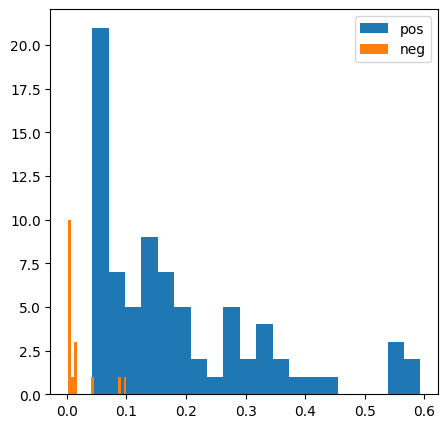

In [53]:
pos = df.query('ligand == "Arachadionic Acid" and ok')
neg = df.query('ligand.isna() and ok')

fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.hist(pos['vmax'], bins=20, label='pos')
ax.hist(neg['vmax'], bins=20, label='neg')
plt.legend()
#ax.fill_between(x, eg_dist_neg, np.zeros_like(eg_dist_neg))
#plt.xlim(0, 0.3)
plt.show()

In [56]:
pos['vmax'] / 

7      0.894409
8      0.967606
9      0.965208
10     1.011327
11     0.967113
         ...   
579    0.545749
593    0.793189
595    0.654792
597    0.864065
599    0.541425
Length: 78, dtype: float64

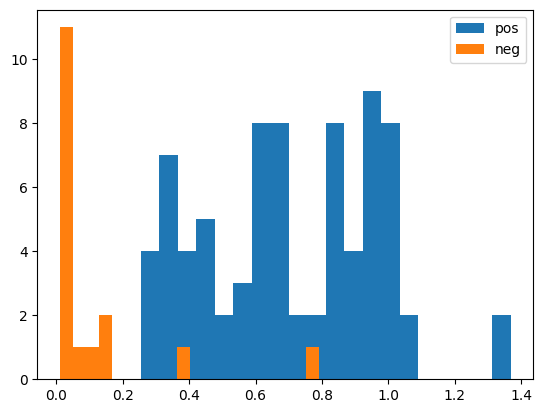

In [61]:
plt.hist(pos['vmax'] / pos['a420_max'], bins=20, label='pos')
plt.hist(neg['vmax'] / neg['a420_max'], bins=20, label='neg')
plt.legend()
#ax.fill_between(x, eg_dist_neg, np.zeros_like(eg_dist_neg))
#plt.xlim(0, 0.3)
plt.show()

In [59]:
pos['vmax'] / pos['a420_max']

7      0.894409
8      0.967606
9      0.965208
10     1.011327
11     0.967113
         ...   
579    0.545749
593    0.793189
595    0.654792
597    0.864065
599    0.541425
Length: 78, dtype: float64

In [60]:
neg['vmax'] / neg['a420_max']

1      0.033401
19     0.023314
26     0.021298
31     0.791857
38     0.147784
57     0.158398
76     0.024304
95     0.039715
114    0.121262
190    0.010664
209    0.079546
228    0.370089
229    0.011233
261    0.032017
262    0.021326
269    0.032097
270    0.022873
dtype: float64